In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<b>No null values to deal with the dataframe.</b>

In [5]:
df.shape

(21613, 21)

<b>Let's plot the correlation between all the features</b>

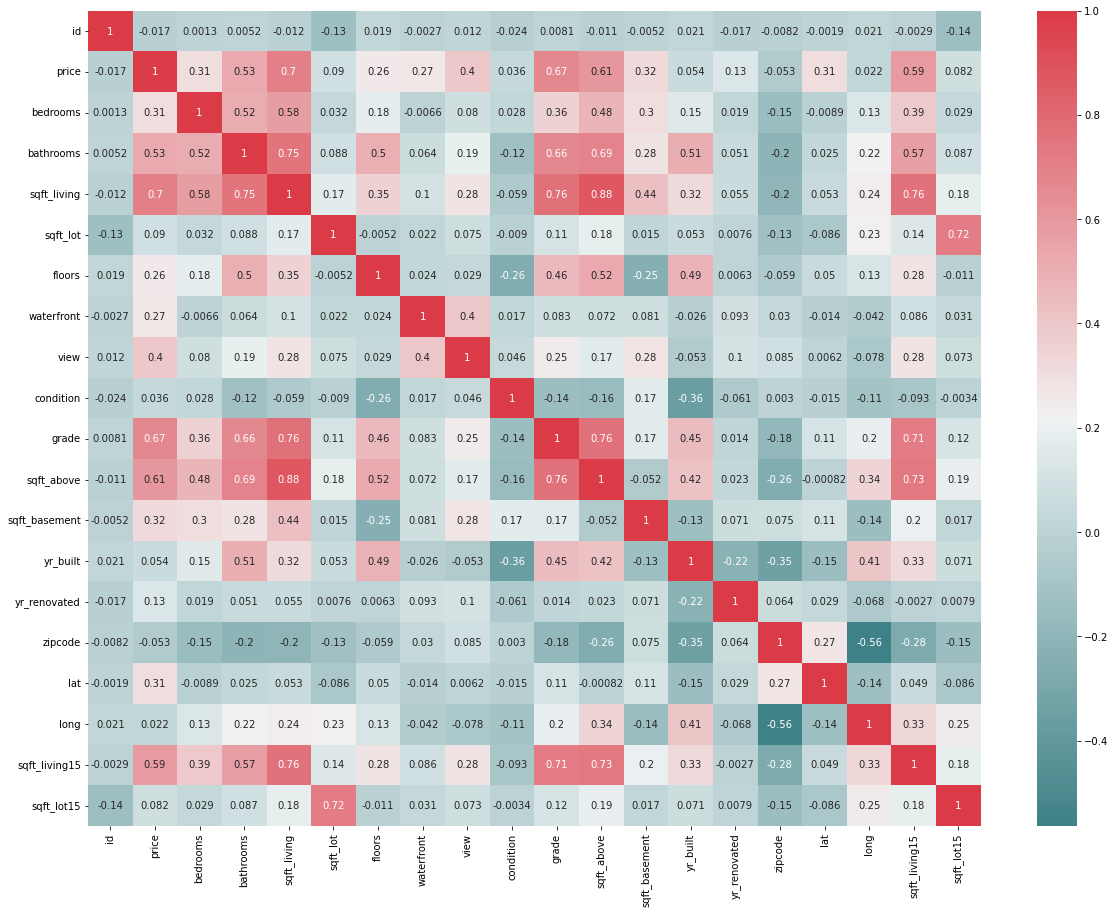

In [6]:
plt.subplots(figsize=(20,15))
colormap=sns.diverging_palette(200,10,as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap=colormap);


<b>It seems that 'sqft_living' feature has the best correlation coefficient with 'price'. In order to verify its impact, let's plot 'sqft_living' vs 'price'.</b>

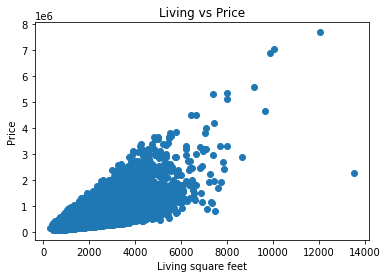

In [7]:
plt.scatter(x=df['sqft_living'],y=df['price'])
plt.xlabel('Living square feet')
plt.ylabel('Price')
plt.title('Living vs Price')
plt.show()

In [9]:
# Examination of the correlation between 'sqft_living' and the other features. The result will determine the importance of each feature in predicting price further

df[['sqft_living','grade','bathrooms','bedrooms','sqft_above']].corr()

,sqft_living,grade,bathrooms,bedrooms,sqft_above
sqft_living,1.000000,0.762704,0.754665,0.576671,0.876597
grade,0.762704,1.000000,0.664983,0.356967,0.755923
bathrooms,0.754665,0.664983,1.000000,0.515884,0.685342
bedrooms,0.576671,0.356967,0.515884,1.000000,0.477600
sqft_above,0.876597,0.755923,0.685342,0.477600,1.000000


In [10]:
# Examination of the importance of the 'waterfront' feature
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [11]:
df[['price','waterfront']].groupby('waterfront').mean()

,price
waterfront,
0,5.315636e+05
1,1.661876e+06


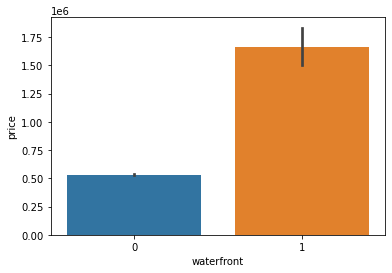

In [12]:
sns.barplot(x='waterfront',y='price',data=df)
plt.show()

<b>'waterfront' feature can be a key factor for predicting price. According to the correlation coefficient with 'price' feature, it will be taken into account in the multi-linear regression study.</b>

In [13]:
# Examination of the importance of the number of bedrooms

df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [14]:
df[['price','bedrooms']].groupby('bedrooms').mean()

,price
bedrooms,
0,4.095038e+05
1,3.176429e+05
2,4.013727e+05
3,4.662321e+05
4,6.354195e+05
5,7.865998e+05
6,8.255206e+05
7,9.511847e+05
8,1.105077e+06


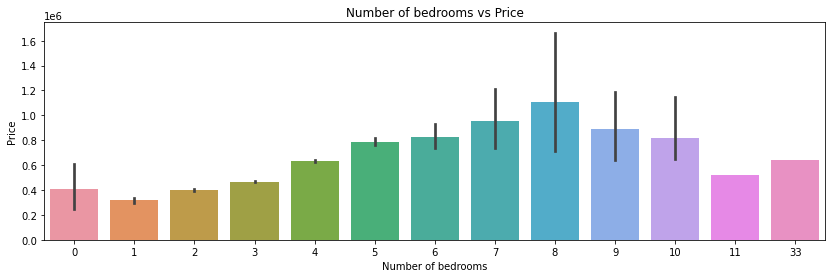

In [16]:
plt.figure(figsize=(14,4))
sns.barplot(x='bedrooms',y='price',data=df)
plt.xlabel('Number of bedrooms')
plt.ylabel('Price')
plt.title('Number of bedrooms vs Price')
plt.show()

<b>From this result, it seems that price has a positive linear progression from 1 to 8 numbers of bedrooms,but it decreases from 9 to 11. 11 and 33 numbers of bedrooms are outliers. The numbers of bedrooms can be useful to predict the variation of house price.</b>

In [17]:
# Examination of the number of bathrooms

df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

<b>This result indicates that all values are presented in a float format which is not appropriate to quantify the real number of bathrooms. So, it's better to round and cast them to an integer.</b>

In [22]:
df['bathrooms']=round(df['bathrooms']).astype(int)
df['bathrooms'].value_counts()

2    13851
1     3933
3     2527
4     1201
5       57
6       24
0       14
8        4
7        2
Name: bathrooms, dtype: int64

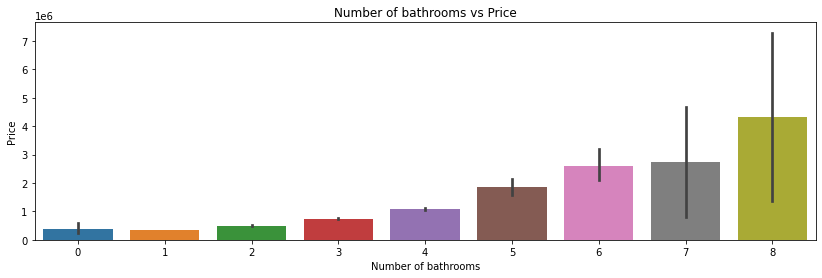

In [23]:
# Let's plot the number of bathrooms with price

plt.figure(figsize=(14,4))
sns.barplot(x='bathrooms',y='price',data=df)
plt.xlabel('Number of bathrooms')
plt.ylabel('Price')
plt.title('Number of bathrooms vs Price')
plt.show()

<b>As well as the number of bathrooms increases, the price shows a positive progression. The number of bathrooms can be useful to predict price variation.</b>

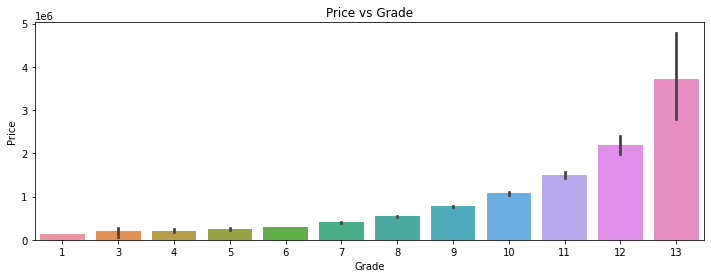

In [24]:
plt.figure(figsize=(12,4))
sns.barplot(x='grade',y='price',data=df)
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Price vs Grade')
plt.show()

In [25]:
df[['price','grade']].groupby('grade').mean()

,price
grade,
1,1.420000e+05
3,2.056667e+05
4,2.143810e+05
5,2.485240e+05
6,3.019196e+05
7,4.025903e+05
8,5.428528e+05
9,7.735132e+05
10,1.071771e+06


<b>As well as grade increases, the price shows a progression too. 'grade' feature can be useful for price house prediction.</b>

<b><u>FEATURES SELECTION CONCLUSION</u></b>

<b>From the correlation coefficient, 'sqft_living' is the most significant to predict the price. In addition, 'grade' feature shows a significantly progression. These two features will be used for Linear Regression.</b>
    
<b>It is also notice that 'sqft_living' has a strong correlation with: 'grade','bathrooms','bedrooms','sqft_above' features. So they will be used for multi-linear regression model with 'sqft_living' feature. The same features will be used for polynomial regression.
</b>

<b><u>1. LINEAR REGRESSION</u></b>

<b>Let's start the linear regression with 'sqft_living' feature.</b>

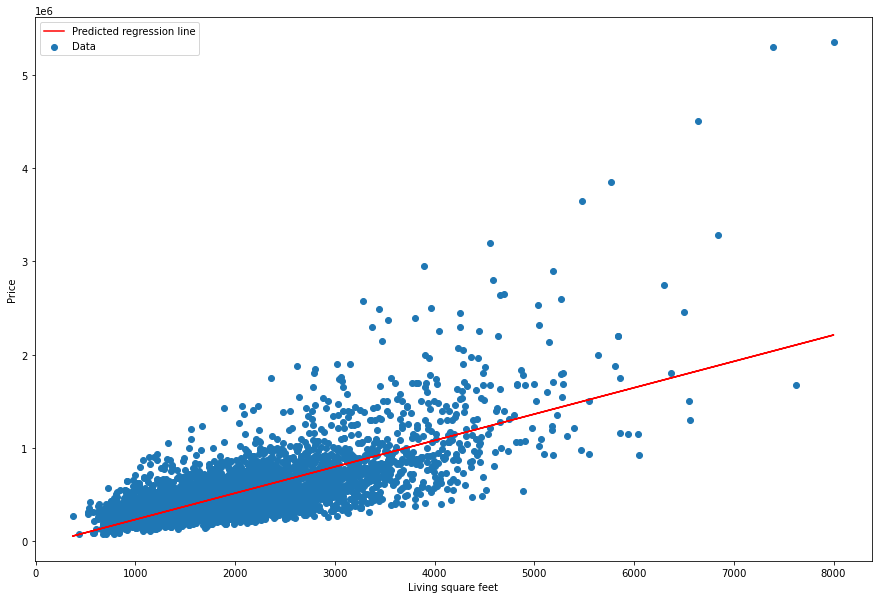

In [26]:
x=df['sqft_living'].values
y=df['price'].values

# Split data with test size 20%

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

# Reshaping x_train, y_train, x_test, y_test

x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

# Build linear regression model

model= LinearRegression()

# Fitting the training data

model.fit(x_train,y_train)

# Make predictions using the testing set

pred=model.predict(x_test)

# Plot the linear regression
plt.subplots(figsize=(15,10))
plt.scatter(x_test,y_test,label='Data')
plt.plot(x_test,pred,color='red',label='Predicted regression line')
plt.xlabel('Living square feet')
plt.ylabel('Price')
plt.legend()

plt.show()




In [27]:
# Measure the performance of the linear regression, using the testing set

MSE=metrics.mean_squared_error(y_test,pred)

print('Squared mean error is equal to:',round(np.sqrt(MSE),2))
print('R squared is equal to:',round(metrics.r2_score(y_test,pred),4))

# Linear regression expression based on 'sqft_living' feature

intercept = round(model.intercept_[0],2)
coefficient = round(model.coef_[0][0],2)
sqft_living=df['sqft_living']
print('The expression of the price based on living square feet is:',f"house_price = {intercept} + {coefficient} *sqft_living")


Squared mean error is equal to: 254289.15
R squared is equal to: 0.4962
The expression of the price based on living square feet is: house_price = -47235.81 + 282.25 *sqft_living


<b>Let's continue the linear regression with the 'grade' feature and compare the performance.</b>

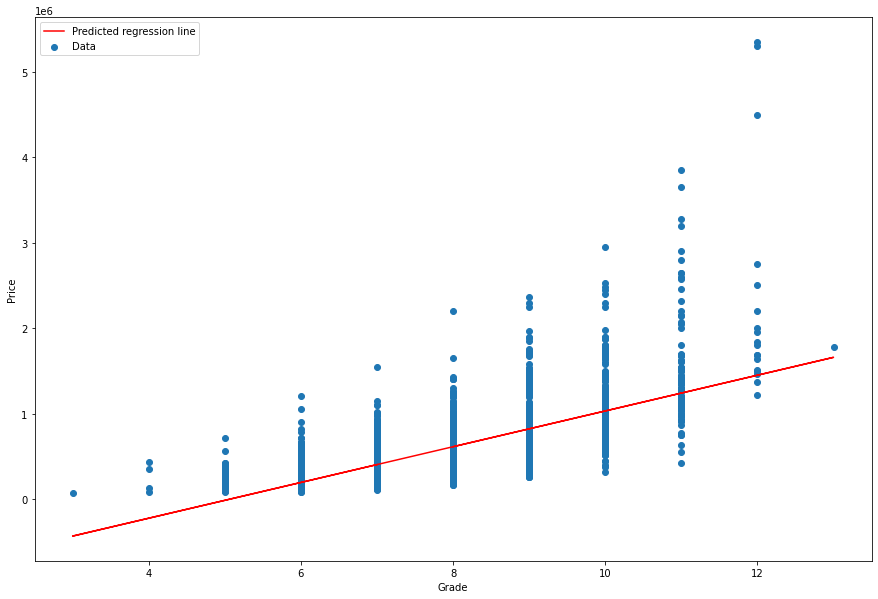

In [28]:
x=df['grade'].values
y=df['price'].values

# Split data with test size 20%

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

# Reshaping x_train, y_train, x_test, y_test

x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

# Build linear regression model

model= LinearRegression()

# Fitting the training data

model.fit(x_train,y_train)

# Make predictions using the testing set

pred=model.predict(x_test)

# Plot the linear regression
plt.subplots(figsize=(15,10))
plt.scatter(x_test,y_test,label='Data')
plt.plot(x_test,pred,color='red',label='Predicted regression line')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.legend()

plt.show()




In [29]:
# Measure the performance of the linear regression, using the testing set

MSE=metrics.mean_squared_error(y_test,pred)

print('Squared mean error is equal to:',round(np.sqrt(MSE),2))
print('R squared is equal to:',round(metrics.r2_score(y_test,pred),4))

# Linear regression expression based on 'grade' feature

intercept = round(model.intercept_[0],2)
coefficient = round(model.coef_[0][0],2)
grade=df['grade']
print('The expression of the price based on grade is:',f"house_price = {intercept} + {coefficient} *grade")


Squared mean error is equal to: 263387.61
R squared is equal to: 0.4595
The expression of the price based on grade is: house_price = -1061459.62 + 209225.48 *grade


<b>From this result, we can conclude that half of price variation can be explained by the model based on 'sqft_living' and 'grade' features. Linear regression model was also studied with 'bedrooms' and 'bathrooms' features but the model performance was very weak compared to the studies shown above.</b>

<b><u>2. MULTI-LINEAR REGRESSION</u></b>

<b>As previously said: 'sqft_living','grade','bedrooms,'bathrooms','sqft_above' features will be used for multi-linear regression.</b>

In [30]:
x=df[['sqft_living','grade','bathrooms','sqft_above','sqft_living15','bedrooms']]
y=df['price'].values

# Split data with test size 20%

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

# Build the multi-linear regression

model=LinearRegression()

# Fitting the training data

model.fit(x_train,y_train)

# Predict the testing set

predicted= model.predict(x_test)

# Model performance measures

MSE=mean_squared_error(y_test,predicted)

print('Mean squared error is equal to:',round(np.sqrt(MSE),2))

print('R squared is equal to:',round(metrics.r2_score(y_test,predicted),2))

print('Intercept= ',model.intercept_)
print('Coefficient=',model.coef_)

Mean squared error is equal to: 238568.74
R squared is equal to: 0.56
Intercept=  -520392.65189313015
Coefficient= [ 2.58070056e+02  9.74069729e+04  1.59464724e+04 -8.59978284e+01
  2.52730720e+01 -4.48251375e+04]


<b>With 'grade','bathrooms','sqft_above' and 'sqft_living','sqft_living15','bedrooms' features, an improvement is noticed in terms of house price prediction. Let's add more features: 'floors','view','waterfront' </b>

In [31]:
x=df[['sqft_living','grade','bathrooms','sqft_above','sqft_living15','bedrooms','floors','view','waterfront']]
y=df['price'].values

# Split data with test size 20%

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

# Build the multi-linear regression

model=LinearRegression()

# Fitting the training data

model.fit(x_train,y_train)

# Predict the testing set

predicted= model.predict(x_test)

# Model performance measures

MSE=mean_squared_error(y_test,predicted)

print('Mean squared error is equal to:',round(np.sqrt(MSE),2))

print('R squared is equal to:',round(metrics.r2_score(y_test,predicted),2))

print('Intercept= ',model.intercept_)
print('Coefficient=',model.coef_)

Mean squared error is equal to: 224152.58
R squared is equal to: 0.61
Intercept=  -484868.81742976524
Coefficient= [ 2.08549582e+02  9.60615911e+04  1.95704276e+04 -3.94809678e+01
  8.09886664e+00 -3.38443614e+04 -2.32845399e+04  6.33801784e+04
  5.50895956e+05]


<b>Compared to linear regression model, this second multi-linear regression improves the performance of the model with a score of R squared equals to 0.61. Briefly 9 features can be useful in order to predict the house price</b>

<b><u>3. POLYNOMIAL REGRESSION</u></b>

<b>Polynomial regression will be done with degree 2 and degree 3</b>

In [32]:
x=df[['sqft_living','grade','bathrooms','sqft_above','sqft_living15','bedrooms','floors','view','waterfront']]
y=df['price'].values


# Split data with test size 20%

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

# Build linear regression

lg=LinearRegression()

# Build polynomial regression degree=2

poly=PolynomialFeatures(degree=2)

# Transform the training set

x_train_fit=poly.fit_transform(x_train)

# Fitting data

lg.fit(x_train_fit,y_train)

# Transform the testing set

x_test_fit=poly.fit_transform(x_test)

# Predict price

predicted=lg.predict(x_test_fit)

# Model performance measures

MSE=mean_squared_error(y_test,predicted)
print('Mean squared error is equal to:',round(np.sqrt(MSE),2))

print('R squared is equal to:',round(metrics.r2_score(y_test,predicted),2))

Mean squared error is equal to: 203615.06
R squared is equal to: 0.68


In [33]:
x=df[['sqft_living','grade','bathrooms','sqft_above','sqft_living15','bedrooms','floors','view','waterfront']]
y=df['price'].values


# Split data with test size 20%

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

# Build linear regression

lg=LinearRegression()

# Build polynomial regression degree=3

poly=PolynomialFeatures(degree=3)

# Transform the training set

x_train_fit=poly.fit_transform(x_train)

# Fitting data

lg.fit(x_train_fit,y_train)

# Transform the testing set

x_test_fit=poly.fit_transform(x_test)

# Predict price

predicted=lg.predict(x_test_fit)

# Model performance measures

MSE=mean_squared_error(y_test,predicted)
print('Mean squared error is equal to:',round(np.sqrt(MSE),2))

print('R squared is equal to:',round(metrics.r2_score(y_test,predicted),2))

Mean squared error is equal to: 208945.35
R squared is equal to: 0.66


<b>From this result, polynomial regression model with degree = 2 shows the best permformance in order to predict the price house.</b>

<b><u>3. GENERAL CONCLUSION</u></b>

<b>The study started with the choice of the independent features to use in order to determine the most important feature which allows to predict the house price. According to the correlation coefficient, the 'sqft_living' feature shows à high score in correlation with price. First, it is used in the linear regression model which presents a R squared score of 0.4962.
Then a linear regression model based on 'grade' feature also has been held, and the R sqared score is 0.4595. The two features having high correlation coefficients with price allow to conclude that with a linear regression model, a half of variation of the price can be predicted.
</b>

<b>For multi-linear regression, two models are studied. Based on the correlation coefficients, six features are taken into account with a R squared score of 0.56. Then three more features are added, and the result shows of R squared of 0.61, which allow to say that there is an improvement.</b>

<b>With there nine features, the study continues with the polynomial regression with a degree = 2 and a degree = 3.
The final result shows that a polynomial regression model with a degree = 2 within the nine features (0.68) is better than the model with a degree = 3 (0.66).</b>
    
<b>In conclusion, from a linear regression model with 'sqft_living' feature, an important improvement of R squared score is obtained with nine features used in a polynomial regression model, with a degree equal two.
</b>